In [4]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##read and copy


In [5]:
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=data.copy()

##data explortion


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
shape=df.shape

In [9]:

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
columns_categcal=df.select_dtypes(include=['object']).columns
columns_numarcal=df.select_dtypes(include=['number']).columns

In [14]:
for col in columns_categcal:
  values=df[col].value_counts()
  num_of_values=df[col].nunique()
  print(f"data shape {shape}\n values in {col} \n \n {values} \n \nnum_of_values = {num_of_values}\n data type {df[col].dtype}\n__________________________________")

data shape (7043, 21)
 values in customerID 
 
 customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64 
 
num_of_values = 7043
 data type object
__________________________________
data shape (7043, 21)
 values in gender 
 
 gender
Male      3555
Female    3488
Name: count, dtype: int64 
 
num_of_values = 2
 data type object
__________________________________
data shape (7043, 21)
 values in Partner 
 
 Partner
No     3641
Yes    3402
Name: count, dtype: int64 
 
num_of_values = 2
 data type object
__________________________________
data shape (7043, 21)
 values in Dependents 
 
 Dependents
No     4933
Yes    2110
Name: count, dtype: int64 
 
num_of_values = 2
 data type object
__________________________________
data shape (7043, 21)
 values in PhoneService 
 
 PhoneService
Yes    6361
No      682
Name: count, dtype: 

In [15]:

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df=df.dropna(how='any')


In [16]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [17]:
for col in columns_numarcal:
  values=df[col].value_counts()
  num_of_values=df[col].nunique()
  print(f"data shape {shape}\n values in {col} \n \n {values} \n \nnum_of_values = {num_of_values}\n data type {df[col].dtype}\n__________________________________")

data shape (7043, 21)
 values in SeniorCitizen 
 
 SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64 
 
num_of_values = 2
 data type int64
__________________________________
data shape (7043, 21)
 values in tenure 
 
 tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64 
 
num_of_values = 72
 data type int64
__________________________________
data shape (7043, 21)
 values in MonthlyCharges 
 
 MonthlyCharges
20.05    61
19.95    44
19.90    44
19.85    44
19.65    43
         ..
21.45     1
87.75     1
73.10     1
56.85     1
43.05     1
Name: count, Length: 1584, dtype: int64 
 
num_of_values = 1584
 data type float64
__________________________________


##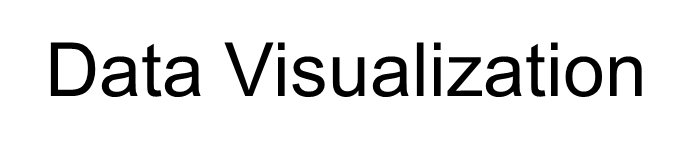

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


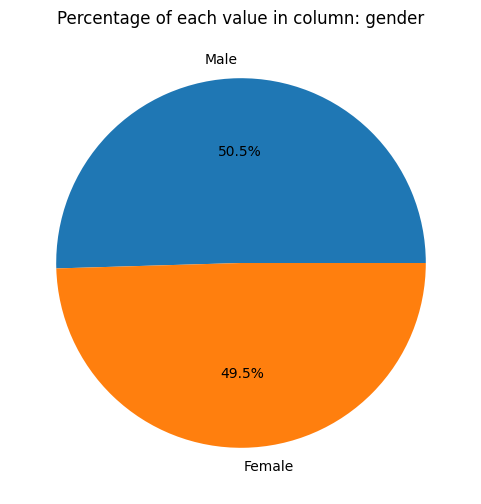

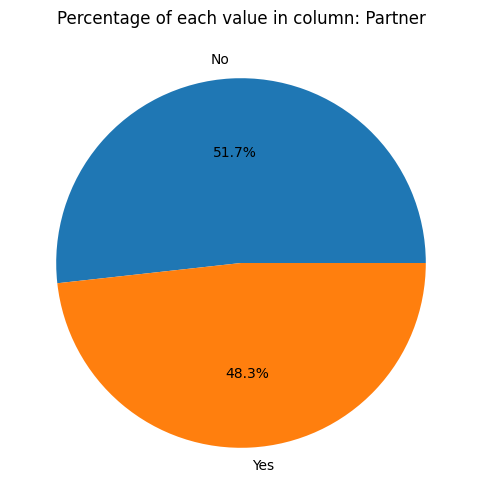

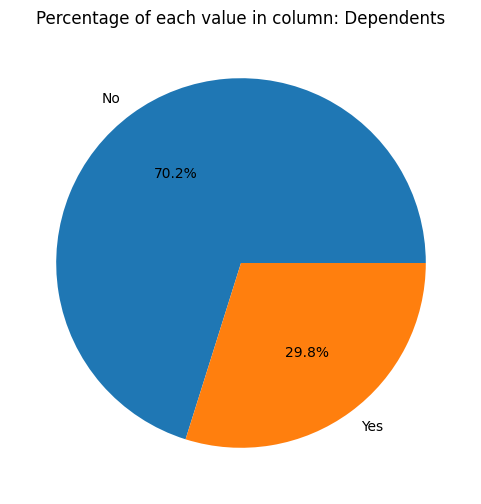

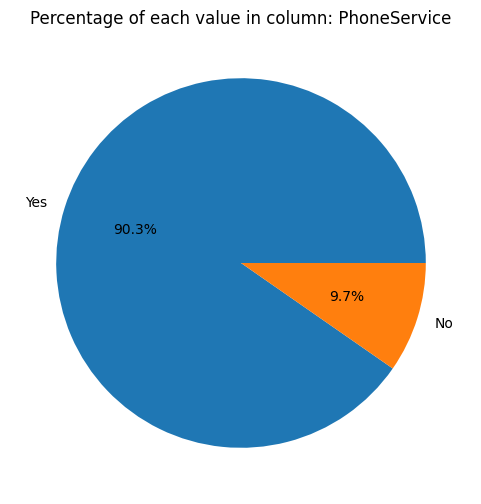

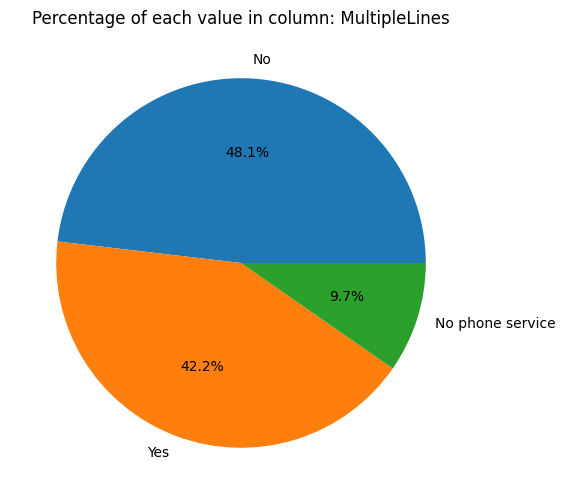

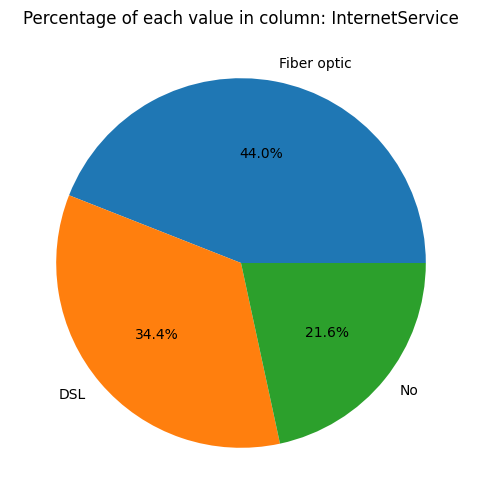

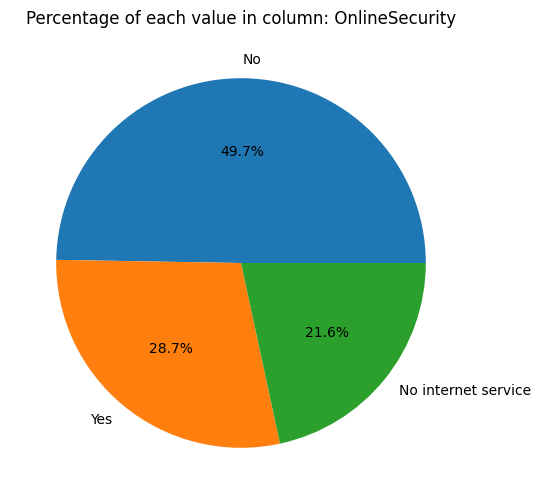

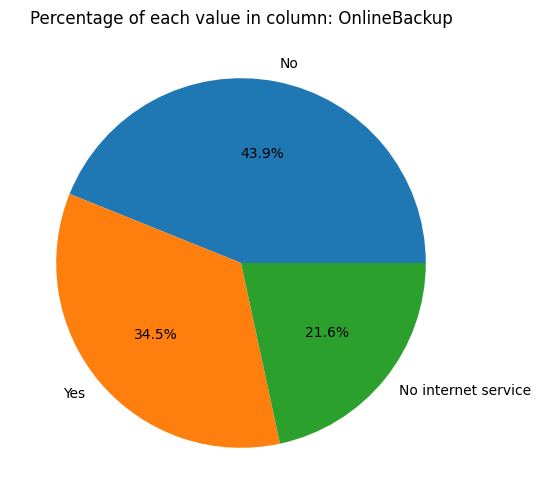

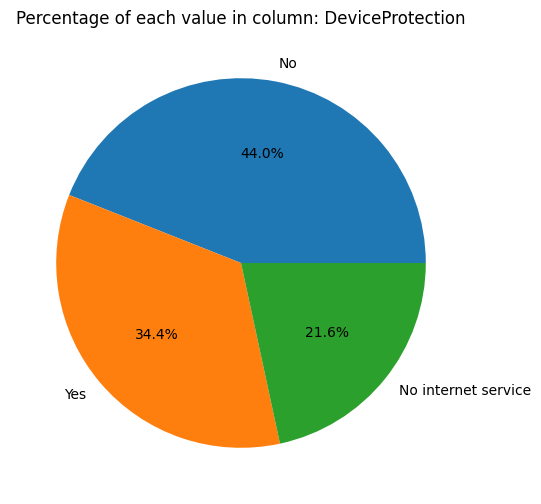

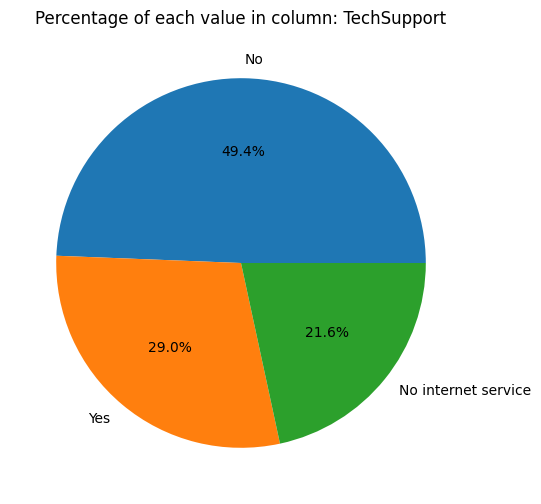

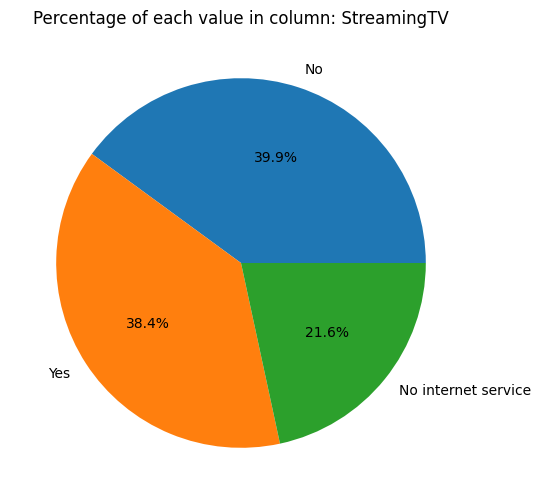

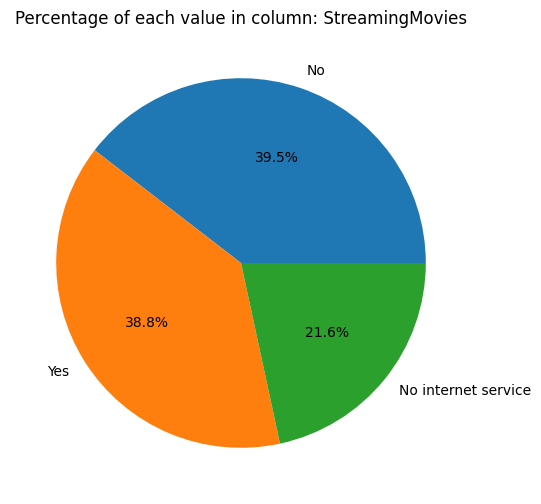

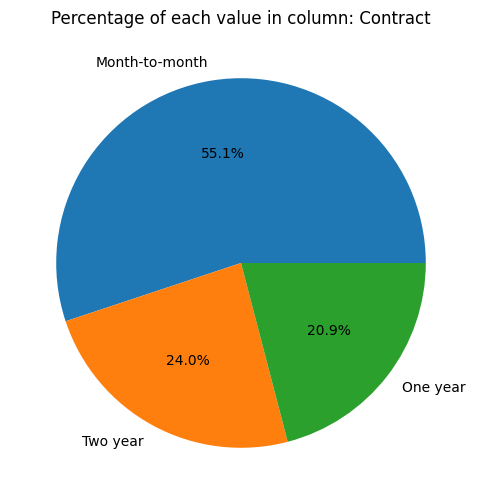

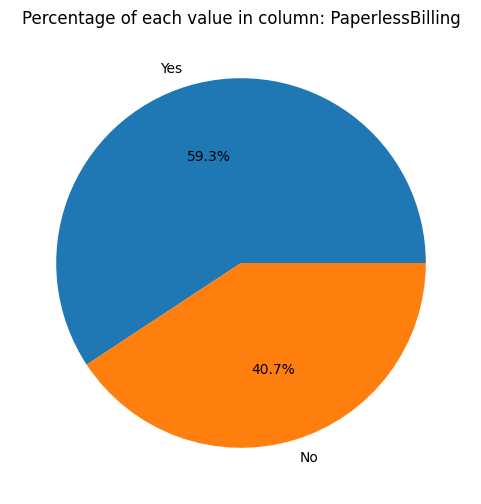

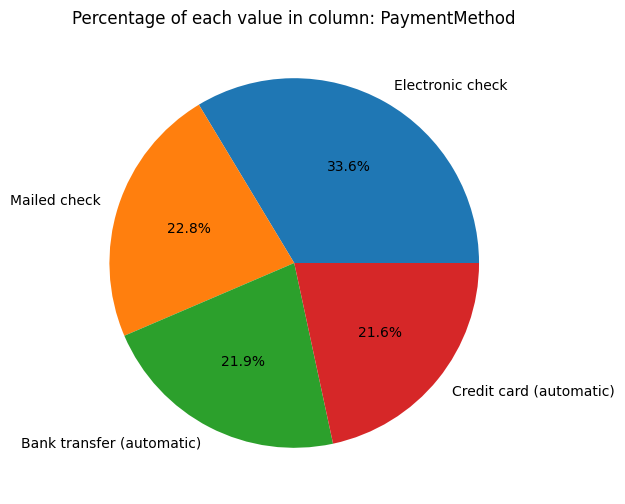

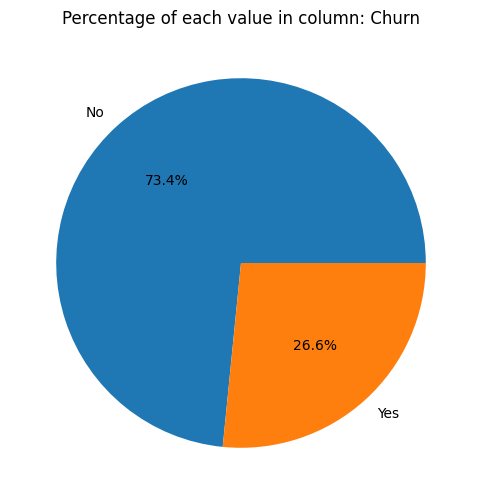

In [49]:
def percent(column_name):
  churn_rate = df[column_name].value_counts(normalize=True) *100
  plt.figure(figsize=(6, 6))
  plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%')
  plt.title(f'Percentage of each value in column: {col}')
  plt.show()
  print("\n\n")
for col in columns_categcal.drop(['TotalCharges','customerID']):
  column_name=col
  percent(column_name)

Text(0.5, 1.0, 'relation beetween tenure and Churn')

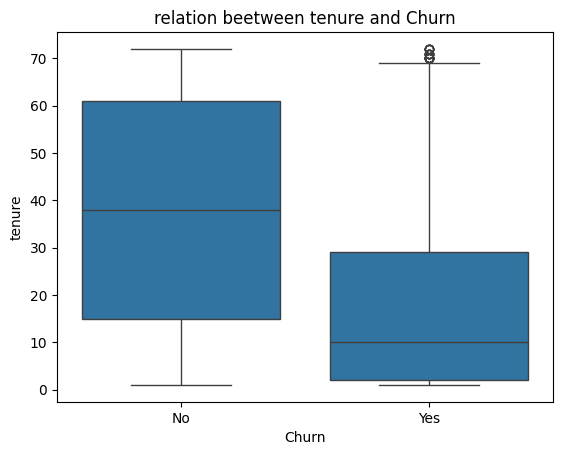

In [47]:
sns.boxplot(x=df['Churn'],y=df['tenure'])
plt.title('relation beetween tenure and Churn')


<function matplotlib.pyplot.show(close=None, block=None)>

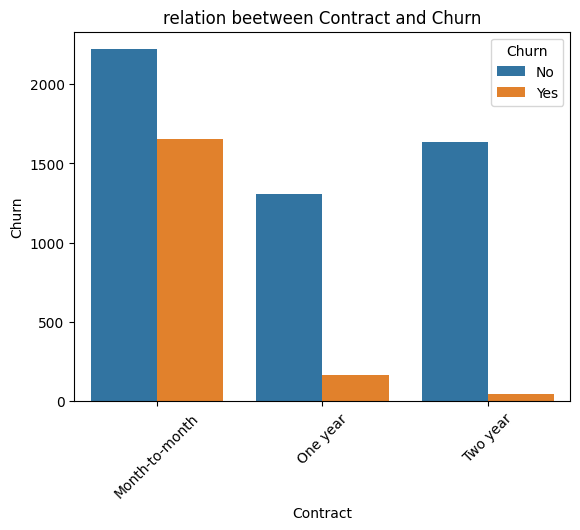

In [277]:
sns.countplot(data=df,x=df['Contract'],hue=df['Churn'])
plt.xticks(rotation=45)
plt.xlabel('Contract')
plt.ylabel('Churn')
plt.title('relation beetween Contract and Churn')
plt.show

Text(0.5, 1.0, 'relation beetween PaymentMethod and Churn')

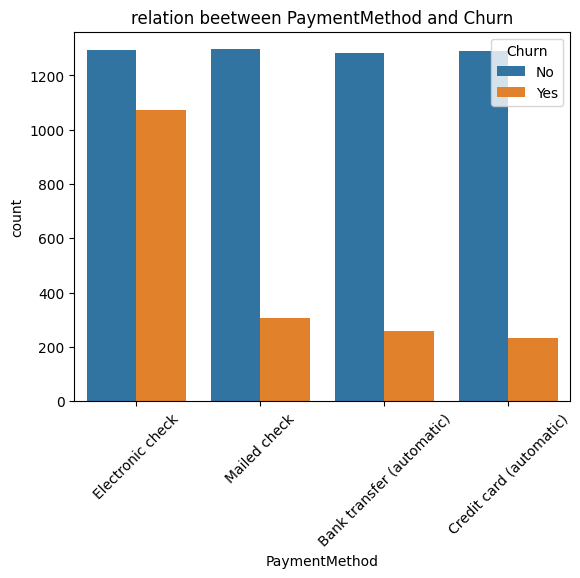

In [271]:
sns.countplot(data=df,x=df['PaymentMethod'],hue=df['Churn'])
plt.xticks(rotation=45)
plt.title("relation beetween PaymentMethod and Churn")
plt.show

Text(0.5, 1.0, 'relation beetween PhoneService and Churn')

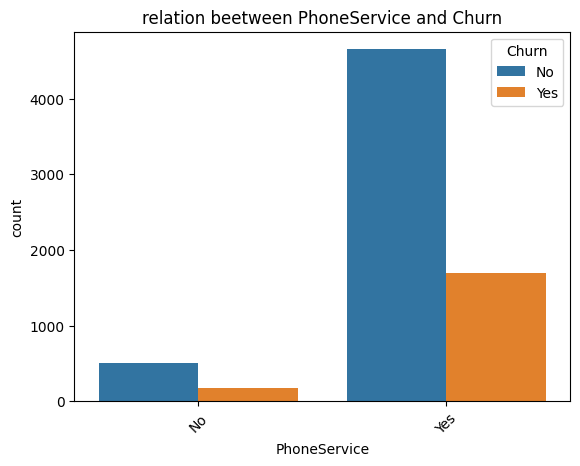

In [279]:
sns.countplot(data=df,x=df['PhoneService'],hue=df['Churn'])
plt.xticks(rotation=45)
plt.title("relation beetween PhoneService and Churn")

<function matplotlib.pyplot.show(close=None, block=None)>

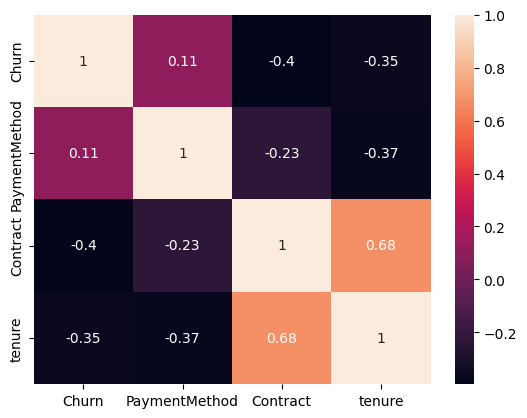

In [232]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in ['Churn','PaymentMethod','Contract']:
  df[col]=le.fit_transform(df[col])
sns.heatmap(df[['Churn','PaymentMethod','Contract','tenure']].corr(),annot=True)
plt.show

##report

1️⃣ Customer Churn Rate:
🔸 Based on the analysis, approximately 26% of customers churn.

2️⃣ New Customers:
🔸 These customers are typically new customers whose tenure ranges from 5 to 25 months. Therefore, the company should offer additional incentives to these customers to reduce churn.

3️⃣ Contract Type:
🔸 Based on the analysis, we found that most of the customers who churn have a month-to-month contract, indicating that contract type has a significant impact on churn rate.

4️⃣ Payment Method:
🔸 Additionally, the analysis showed that customers who pay through electronic checks are more likely to churn.

5️⃣ Mobile Services:
🔸 According to the analysis, approximately 90% of customers use mobile services. Although the majority of these customers did not leave the company, there is still a considerable portion (between 1,500 and 2,000 customers) who use mobile services and churn. Therefore, mobile services should be further improved.bold text